In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
dataset = pd.read_csv("Churn Modeling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset[['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


Analisando a tabela acima nota-se que pelo menos 25% dos registros possui 0 de valor em conta na coluna 'Balance'.

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Observa-se que não contém registro nulo na base de dados. Temos 10000 registros, com dados de tipos variados entre object, inteiros e floats.


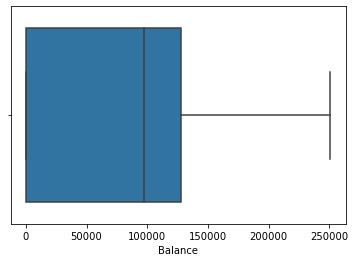

In [5]:
sns.boxplot(x = 'Balance', data = dataset)
plt.show()

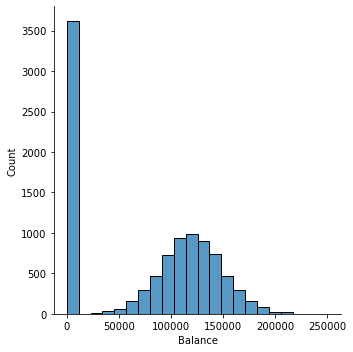

In [6]:
sns.displot(x = 'Balance', data = dataset)
plt.show()

Muitos registros de clientes com zero em conta.

In [7]:
balance_zero = dataset.loc[dataset['Balance'] == 0]
balance_zero_exit = balance_zero.loc[dataset['Exited'] == 1]
balance_zero_exit.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
22,23,15699309,Gerasimov,510,Spain,Female,38,4,0.0,1,1,0,118913.53,1
30,31,15589475,Azikiwe,591,Spain,Female,39,3,0.0,3,1,0,140469.38,1
58,59,15623944,T'ien,511,Spain,Female,66,4,0.0,1,1,0,1643.11,1
81,82,15663706,Leonard,777,France,Female,32,2,0.0,1,1,0,136458.19,1


In [8]:
len_exited = len(balance_zero_exit)
len_exited

500

In [9]:
exited_igual_um = len(dataset.loc[dataset['Exited'] == 1 ])
exited_igual_um 

2037

In [10]:
percent = (len_exited / exited_igual_um) * 100
print((f'Porcentagem de clientes que com zero na conta e que deixaram o banco: {percent :.4f}%'))

Porcentagem de clientes que com zero na conta e que deixaram o banco: 24.5459%


Aproximadamente 25% dos clientes que deixaram o banco tem valor 0 em conta.

In [11]:
count_exited = dataset['Exited'].value_counts()
count_exited

0    7963
1    2037
Name: Exited, dtype: int64

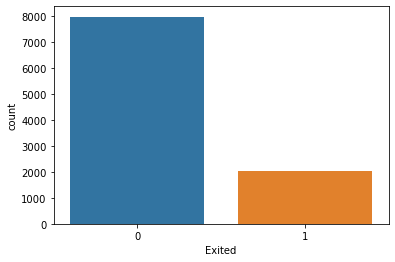

In [12]:
sns.countplot('Exited', data = dataset)
plt.show()

Nota-se que a variável alvo esta desbalanceada. São poucos registros de clientes que deixaram o banco e para um algoritmo de machine learning o ideal é que tenhamos a variável alvo em equilibrio. Vamos trabalhar isso mais adiante

In [13]:
# número de posses 
Tenure = dataset['Tenure'].sort_values().unique()
Tenure

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [14]:
# contagem de quantas posses tem cada cliente 
count_tenure = dataset['Tenure'].value_counts()
count_tenure

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

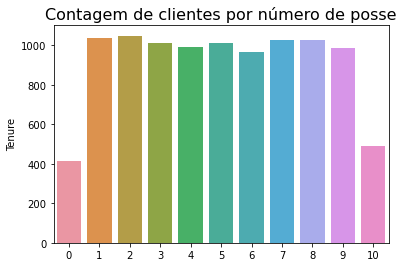

In [15]:
sns.barplot(x = Tenure, y = count_tenure.sort_index(), data = dataset)
plt.title('Contagem de clientes por número de posse', fontdict={'size':'16'})
plt.show()

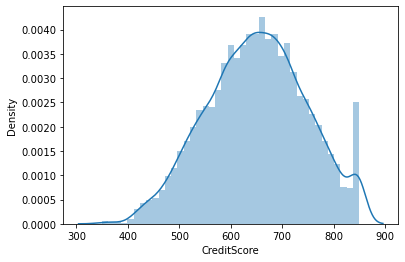

In [23]:
# olhando para a variavel CreditScore
sns.distplot(dataset['CreditScore'])
plt.show()

In [40]:
dataset['CreditScore'].max()

850

In [50]:
max_credit = dataset.loc[dataset['CreditScore'] == 850 ]
max_credit.value_counts().sum()


233

In [47]:
max_credit = dataset.loc[dataset['CreditScore'] == 850 ]
max_credit_igual_um = max_credit.loc[dataset.Exited == 1]
max_credit_igual_um.value_counts().sum()

43

In [51]:
porcent0 = len(max_credit) / len(max_credit_igual_um)
print(f'Porcentagem das pessoas com pontuação maxima no score que saíram do banco {porcent0 :.4f}%')

Porcentagem das pessoas com pontuação maxima no score que saíram do banco 5.4186%


In [28]:
credit_filter = dataset.loc[dataset['CreditScore'] >= 600]
credit_filter.value_counts().sum()

6966

In [32]:
credit_exit = credit_filter.loc[dataset['Exited'] == 1]
credit_exit.value_counts().sum()

1377

In [35]:
porcent1 = len(credit_filter) / len(credit_exit) 
print(f'Pessoas que sairam com Score maoir ou igual a 600. {porcent1:.4f}%')

Pessoas que sairam com Score  maoir igual a 600. 5.0588%


In [39]:
credit_exit.loc[dataset['Balance'] == 0].value_counts().sum()

337

Pessoas com o score maior ou igual a 600 são menos propensas a deixar a instituição bancária. Observando a análise acima pode-se observar que pouco mais de 5% dos clientes com essa caracteristica saíram. A mesma situação se aplica na observação das pessoas com o maximo da pontuação de score, notado pouco mais de 5% de saida. 